In [5]:
file1 = open(r'C:\Users\91892\Desktop\5TH SEM\Predictive Learning\Discovering-Disease-Outbreaks-From-News-Headlines-master\Tracking the Coronavirus Pandemic (Part 5)\Datasets\6-23-2020\headline.txt', 'r', encoding='utf-8') 
file2 = open(r'C:\Users\91892\Desktop\5TH SEM\Predictive Learning\Discovering-Disease-Outbreaks-From-News-Headlines-master\Tracking the Coronavirus Pandemic (Part 5)\Datasets\6-23-2020\headline_world.txt', 'r', encoding='utf-8')
headline_lines = file1.readlines() 
headline_world_lines = file2.readlines()
  
headlines = []
for line in headline_lines: 
    headlines.append(line.strip())
for line in headline_world_lines:
    headlines.append(line.strip())

headlines = list(set(headlines))
print(len(headlines))

8555


In [6]:
for i in range(len(headlines)):
    headline = str(headlines[i])
    size = len(headline)-2
    if (size <= 0):
        continue
    while (size != 0):
        if (headline[size-1:size+2] == " | " or headline[size-1:size+2] == ' - ' or headline[size-1:size+2] == ' – '):
            break
        size-=1
    if (size != 0):
        headlines[i] = headline[:size-1]

print(headlines[100:105])

['4 More Veterans Die At Holyoke Soldiers’ Home Where Dozens Have Tested Positive For Coronavirus', 'Pence Urges Americans To Wear Masks To Stop Spread Of COVID-19 : Coronavirus Live Updates : NPR', 'US Coronavirus Updates: Biden Says May Not Be Dem Convention; American Death Toll Eclipses China’s', 'More than 2,400 U.S. coronavirus deaths reported Wednesday; officials respond after Trump suspends WHO funding', 'No hay pruebas de COVID-19 disponibles para niños y adolescentes en las grandes farmacias de Tampa']


In [7]:
import pandas as pd
import geonamescache
import numpy as np
import re
import unidecode
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from math import radians, cos, sin, sqrt, asin
import collections

In [8]:
gnc = geonamescache.GeonamesCache()
country_names = [k for k in gnc.get_countries_by_names()]

country_counter = {}
for index in country_names:
    country_counter[index] = 0

county_names = {}
county_counter = {}
for index in gnc.get_us_counties():
    if (not index['name'] in county_names):
        county_names[str(index['name'])] = str(index['state'])
        county_counter[str(index['name'])] = 0
county_names_sorted = list(county_names.keys())
county_names_sorted.sort()
    
state_names = []
state_keys = {}
state_counter = {}
state_repository = gnc.get_us_states()
for index in list(state_repository.keys()):
    state_names.append(state_repository[index]['name'])
    state_keys[state_repository[index]['code']] = state_repository[index]['name']
    state_counter[state_repository[index]['name']] = 0
    
print("Here are the first five countries extracted: ")
print(country_names[:5])
print("Here are the first five counties extracted: ")
print(county_names_sorted[:5])
print("Here are the first five states extracted: ")
print(state_names[:5])

Here are the first five countries extracted: 
['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla']
Here are the first five counties extracted: 
['Abbeville County', 'Acadia Parish', 'Accomack County', 'Ada County', 'Adair County']
Here are the first five states extracted: 
['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California']


In [9]:
dictionary = {'headline':[], 'countries':[], 'cities':[], 'states':[], 'counties':[]}

for i in headlines:
    dictionary['headline'].append(i)
    i = unidecode.unidecode(i)
    words = i.split()
    for x in range(len(words)):
        if (not words[x][-1].isalnum()):
            words[x] = words[x][:-1]
    for j in range(len(words)):
        poss_cities = []
        string = words[j]
        if (gnc.get_cities_by_name(words[j]) != []):
            poss_cities.append(string)
        
        for k in range(j+1, len(words)):
            string += " " + words[k]
            if (gnc.get_cities_by_name(string) != []):
                poss_cities.append(string)
        
        if (len(poss_cities) != 0):
            dictionary['cities'].append(poss_cities[-1])
            break
    for j in range(len(words)):
        poss_countries = []
        string = words[j]
        if (string in country_names):
            poss_countries.append(string)
            if (string in list(country_counter.keys())) and (string != "Georgia") and (string != "Jersey"):
                country_counter[string]+=1
        
        for k in range(j+1, len(words)):
            string += " " + words[k]
            if (string in country_names):
                poss_countries.append(string)
                if (string in list(country_counter.keys())) and (string != "Georgia") and (string != "Jersey"):
                    country_counter[string]+=1
        
        if (len(poss_countries) != 0):
            dictionary['countries'].append(poss_countries[-1])
            break
    for j in range(len(words)):
        list_of_counties = list(county_names.keys())
        poss_counties = []
        string = words[j]
        if (string in list_of_counties):
            poss_counties.append(string)
            if string in list(county_counter.keys()):
                county_counter[string]+=1
        
        for k in range(j+1, len(words)):
            string += " " + words[k]
            if (string in list_of_counties):
                poss_counties.append(string)
                if string in list(county_counter.keys()):
                    county_counter[string]+=1
        
        if (len(poss_counties) != 0):
            dictionary['counties'].append(poss_counties[-1])
            dictionary['states'].append(state_keys[county_names[poss_counties[-1]]])
            break
    for j in range(len(words)):
        poss_states = []
        string = words[j]
        if (string in state_names):
            poss_states.append(string)
            if string in list(state_counter.keys()):
                state_counter[string]+=1
        
        for k in range(j+1, len(words)):
            string += " " + words[k]
            if (string in state_names):
                poss_states.append(string)
                if string in list(state_counter.keys()):
                    state_counter[string]+=1
                
        
        if (len(poss_states) != 0 and len(dictionary['headline']) != len(dictionary['states'])):
            dictionary['states'].append(poss_states[-1])
            break
    if (len(dictionary['headline']) != len(dictionary['countries'])):
        if (len(dictionary['headline']) == len(dictionary['states'])) or (len(dictionary['headline']) == len(dictionary['counties'])):
            dictionary['countries'].append('United States')
            country_counter['United States']+=1
        else:
            dictionary['countries'].append(np.nan)
    if (len(dictionary['headline']) != len(dictionary['cities'])):
        dictionary['cities'].append(np.nan)
    if (len(dictionary['headline']) != len(dictionary['counties'])):
        dictionary['counties'].append(np.nan)
    if (len(dictionary['headline']) != len(dictionary['states'])):
        dictionary['states'].append(np.nan)
    while (len(dictionary['states']) > len(dictionary['headline'])):
        dictionary['states'].pop()

df = pd.DataFrame(data = dictionary)
df

headline      countries  \
0                                                                  NaN   
1     Toni Preckwinkle announces help for small busi...            NaN   
2                                       City of Oakland            NaN   
3     Trump explains rally comment on slowing down C...            NaN   
4     COVID-19 outbreak reported at 3 Wake County lo...  United States   
...                                                 ...            ...   
8550  Remarks by President Trump, Vice President Pen...            NaN   
8551  Boston Protesters Urged To Get Tested For Coro...            NaN   
8552  Marin County coronavirus cases: Tracking the o...  United States   
8553  COVID-19: Mapping vulnerable populations in Ca...  United States   
8554                               Facts about COVID-19            NaN   

       cities          states      counties  
0         NaN             NaN           NaN  
1         NaN             NaN           NaN  
2     Oakland             NaN           NaN  
3         NaN             NaN           NaN  
4         NaN  North Carolina   Wake County  
...       ...             ...           ...  
8550      NaN             NaN           NaN  
8551   Boston             NaN           NaN  
8552      NaN      California  Marin County  
8553      NaN      California           NaN  
8554      NaN             NaN           NaN  

[8555 rows x 5 columns]

In [17]:
def convert_dict_to_df(dict1, value):
    dictionary_counter = {value: [], 'Count':[]}
    for index in list(dict1.keys()):
        dictionary_counter[value].append(index)
        dictionary_counter['Count'].append(dict1[index])
    df = pd.DataFrame(data = dictionary_counter, columns = [value, 'Count'])
    df = df.sort_values(by = ['Count'], ascending = False)
    df = df.reset_index()
    df.index += 1
    del df['index']
    return df
    
df_state = convert_dict_to_df(state_counter, 'State')
df_county = convert_dict_to_df(county_counter, 'County')
df_country = convert_dict_to_df(country_counter, 'Country')

print(df_country.head(10))
print()
print(df_state.head(10))
print()
print(df_county.head(10))

          Country  Count
1   United States   1548
2           China     54
3          Mexico     24
4           India     21
5         Germany     17
6          Brazil     17
7           Italy     13
8          Canada     13
9     South Korea     11
10          Spain      7

            State  Count
1      California    206
2           Texas    164
3         Florida    146
4        Illinois    144
5   Massachusetts    109
6        New York     59
7      New Jersey     57
8       Minnesota     46
9        Colorado     42
10        Arizona     37

                   County  Count
1        Riverside County     28
2        San Diego County     25
3           Orange County     20
4             Cook County     17
5      Santa Clara County     17
6           Dallas County      9
7          Alameda County      8
8   San Bernardino County      8
9       Williamson County      8
10            Lake County      7


In [18]:
gnc = geonamescache.GeonamesCache()

states_lat_long = {
    'Alabama': [32.806671, -86.791130],
    'Alaska': [61.370716, -152.404419],
    'Arizona': [33.729759, -111.431221],
    'Arkansas': [34.969704, -92.373123],
    'California': [36.116203, -119.618564],
    'Colorado': [39.059811, -105.311104], 
    'Connecticut': [41.597782, -72.755371],
    'Delaware': [39.318523, -75.507141],
    'District of Columbia': [38.897438, -77.026817],
    'Florida': [27.766279, -81.686783],
    'Georgia': [33.040619, -83.643074],
    'Hawaii': [21.094318, -157.498337],
    'Idaho': [44.240459, -114.478828],
    'Illinois': [40.349457, -88.986137],
    'Indiana': [39.849426, -86.258278],
    'Iowa': [42.011539, -93.210526],
    'Kansas': [38.526600, -96.726486],
    'Kentucky': [37.668140, -84.670067],
    'Louisiana': [31.169546, -91.867805],
    'Maine': [44.693947, -69.381927],
    'Maryland': [39.063946, -76.802101],
    'Massachusetts': [42.230171, -71.530106],
    'Michigan': [43.326618, -84.536095],
    'Minnesota': [45.694454, -93.900192],
    'Mississippi': [32.741646, -89.678696],
    'Missouri': [38.456085, -92.288368],
    'Montana': [46.921925, -110.454353],
    'Nebraska': [41.125370, -98.268082],
    'Nevada': [38.313515, -117.055374],
    'New Hampshire': [43.452492, -71.563896],
    'New Jersey': [40.298904, -74.521011],
    'New Mexico': [34.840515, -106.248482],
    'New York': [42.165726, -74.948051],
    'North Carolina': [35.630066, -79.806419],
    'North Dakota': [47.528912, -99.784012],
    'Ohio': [40.388783, -82.764915],
    'Oklahoma': [35.565342, -96.928917],
    'Oregon': [44.572021, -122.070938],
    'Pennsylvania': [40.590752, -77.209755],
    'Rhode Island': [41.680893, -71.511780],
    'South Carolina': [33.856892, -80.945007],
    'South Dakota': [44.299782, -99.438828],
    'Tennessee': [35.747845, -86.692345],
    'Texas': [31.054487, -97.563461],
    'Utah': [40.150032, -111.862434],
    'Vermont': [44.045876, -72.710686],
    'Virginia': [37.769337, -78.169968],
    'Washington': [47.400902, -121.490494],
    'West Virginia': [38.491226, -80.954453],
    'Wisconsin': [44.268543, -89.616508],
    'Wyoming': [42.755966, -107.302490]
}

file2 = open(r'C:\Users\91892\Desktop\5TH SEM\Predictive Learning\Discovering-Disease-Outbreaks-From-News-Headlines-master\Tracking the Coronavirus Pandemic (Part 5)\Datasets\county_lat_long.txt', 'r') 
counties = file2.readlines()
#print(counties)

county_data = {}
#Strips the newline character 
for i in range(50, len(counties)):
    county_values = counties[i].strip().split('\t')
    county_data[county_values[3]] = [county_values[-2], county_values[-1]]
    
file2 = open(r'C:\Users\91892\Desktop\5TH SEM\Predictive Learning\Discovering-Disease-Outbreaks-From-News-Headlines-master\Tracking the Coronavirus Pandemic (Part 5)\Datasets\country_lat_long.txt', 'r') 
countries = file2.readlines()
#print(counties)

country_data = {}
#Strips the newline character 
for i in range(len(countries)):
    country_values = countries[i].strip().split('\t')
    country_data[country_values[-1]] = [country_values[-3], country_values[-2]]

print("Here is a subset of the counties:")
print(list(county_data.keys())[:10])
print()
print("Here is a subset of the countries:")
print(list(country_data.keys())[:10])

Here is a subset of the counties:
['Monroe County', 'Montgomery County', 'Morgan County', 'Perry County', 'Pickens County', 'Pike County', 'Randolph County', 'Russell County', 'St. Clair County', 'Shelby County']

Here is a subset of the countries:
['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Netherlands Antilles', 'Angola', 'Antarctica']


In [19]:
latitude = []
longitude = []
country_code = []
df1 = df
for index_val in df1.index:
    city = df1['cities'][index_val]
    state = df1['states'][index_val]
    country = df1['countries'][index_val]
    county = df1['counties'][index_val]
    val = gnc.get_cities_by_name(city)
    
    if (city == np.nan or val == []):
        if (county in list(county_counter.keys())):
            latitude.append(county_data[county][0])
            longitude.append(county_data[county][1])
        else:
            if (state in state_names):
                latitude.append(states_lat_long[state][0])
                longitude.append(states_lat_long[state][1])
            else:
                if (country in list(country_data.keys())):
                    latitude.append(float(country_data[country][0]))
                    longitude.append(float(country_data[country][1]))
                else:
                    latitude.append(np.nan)
                    longitude.append(np.nan)
        country_code.append(np.nan)
    else:
        maxpop = 0
        index = 0
        for j in range(len(val)):
            keys = [e for e in val[j]]
            population = val[j][keys[0]]['population']
            if (population > maxpop):
                maxpop = population
                index = j
        keys = [e for e in val[index]]
        if (maxpop <= 50000) or (city == "York") or (city == "Latina" and country != "Spain"):
            latitude.append(np.nan)
            longitude.append(np.nan)
            country_code.append(np.nan)
            df1.loc[df1.index == index_val, 'cities']=np.nan
        else:
            latitude.append(val[index][keys[0]]['latitude'])
            longitude.append(val[index][keys[0]]['longitude'])
            country_code.append(val[index][keys[0]]['countrycode'])
        #print(index)
        if (str(city) == str(state)):
            df1.loc[df1.index == index_val, 'cities']=np.nan
        if (str(country) == str(city)):
            df1.loc[df1.index == index_val, 'cities']=np.nan
            
latitude = [float(i) for i in latitude]
longitude = [float(i) for i in longitude]

df1['latitude'] = latitude
df1['longitude'] = longitude
df1['countrycode'] = country_code

df = df1.dropna(subset = ['latitude', 'longitude'])
df = df.reset_index()
del df['index']
df

headline      countries  \
0                                       City of Oakland            NaN   
1     COVID-19 outbreak reported at 3 Wake County lo...  United States   
2     Trump staffers test positive for COVID-19 whil...            NaN   
3     Austin needs more than double its current numb...            NaN   
4     Chicago Doctor on Coexisting with COVID-19: ‘I...            NaN   
...                                                 ...            ...   
2337  China's new coronavirus outbreak sees Beijing ...            NaN   
2338  Massachusetts Reports 1,512 New Coronavirus Ca...  United States   
2339  Boston Protesters Urged To Get Tested For Coro...            NaN   
2340  Marin County coronavirus cases: Tracking the o...  United States   
2341  COVID-19: Mapping vulnerable populations in Ca...  United States   

       cities          states      counties   latitude   longitude countrycode  
0     Oakland             NaN           NaN  37.804370 -122.270800          US  
1         NaN  North Carolina   Wake County  35.789846  -78.650624         NaN  
2       Tulsa             NaN           NaN  36.153980  -95.992770          US  
3      Austin             NaN           NaN  30.267150  -97.743060          US  
4     Chicago             NaN           NaN  41.850030  -87.650050          US  
...       ...             ...           ...        ...         ...         ...  
2337  Beijing             NaN           NaN  39.907500  116.397230          CN  
2338      NaN   Massachusetts           NaN  42.230171  -71.530106         NaN  
2339   Boston             NaN           NaN  42.358430  -71.059770          US  
2340      NaN      California  Marin County  38.051817 -122.745974         NaN  
2341      NaN      California           NaN  36.116203 -119.618564         NaN  

[2342 rows x 8 columns]

In [20]:
#Initializing and Adding to New Dictionaries
df_us = {'headline':[], 'cities':[], 'latitude':[], 'counties': [], 'states': [], 'countries': [], 'longitude':[], 'countrycode':[]}
df_world = df
df_no_us = {'latitude':[], 'longitude':[]}
df_no_world = {'latitude':[], 'longitude':[]}

for index in df.index:
    if (df['countries'][index] == "United States"):
        for column in list(df.columns):
            df_us[column].append(df[column][index])
        for column in ['latitude', 'longitude']:
            df_no_us[column].append(df[column][index])
    for column in ['latitude', 'longitude']:
        df_no_world[column].append(df[column][index])
            
#Converting from Dictionary to Dataframe
df_us = pd.DataFrame(data = df_us)
df_no_us = pd.DataFrame(data = df_no_us)
df_no_world = pd.DataFrame(data = df_no_world)

df_us

headline         cities  \
0     COVID-19 outbreak reported at 3 Wake County lo...            NaN   
1     Open for Business: Support local flower farms ...            NaN   
2     Disney delays California theme park reopenings...            NaN   
3     Coronavirus live blog, June 25, 2020: Illinois...            NaN   
4     Arizona sees cases of coronavirus-linked infla...            NaN   
...                                                 ...            ...   
1355        Life In New York City Under The Coronavirus  New York City   
1356  Casinos in Colorado's Gilpin County set June 1...            NaN   
1357  Massachusetts Reports 1,512 New Coronavirus Ca...            NaN   
1358  Marin County coronavirus cases: Tracking the o...            NaN   
1359  COVID-19: Mapping vulnerable populations in Ca...            NaN   

       latitude       counties          states      countries   longitude  \
0     35.789846    Wake County  North Carolina  United States  -78.650624   
1     36.116203            NaN      California  United States -119.618564   
2     36.116203            NaN      California  United States -119.618564   
3     40.349457            NaN        Illinois  United States  -88.986137   
4     33.729759            NaN         Arizona  United States -111.431221   
...         ...            ...             ...            ...         ...   
1355  40.714270            NaN        New York  United States  -74.005970   
1356  39.861156  Gilpin County        Colorado  United States -105.528878   
1357  42.230171            NaN   Massachusetts  United States  -71.530106   
1358  38.051817   Marin County      California  United States -122.745974   
1359  36.116203            NaN      California  United States -119.618564   

     countrycode  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1355          US  
1356         NaN  
1357         NaN  
1358         NaN  
1359         NaN  

[1360 rows x 8 columns]

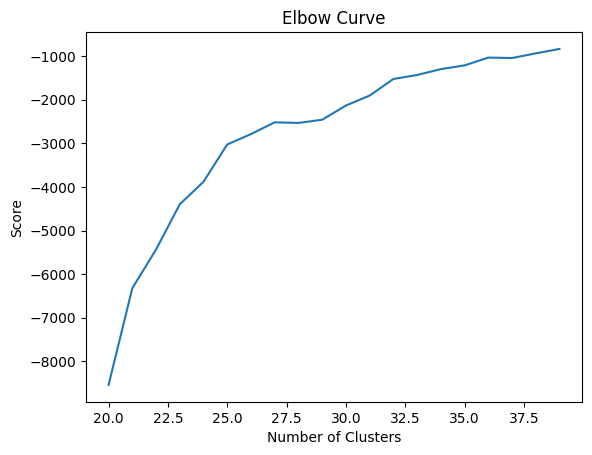

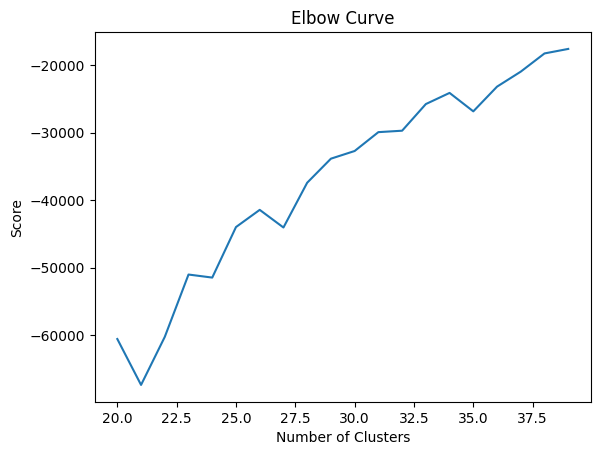

In [21]:
#Elbow Curve
def elbow_curve(df1):
    clusters = range(20, 40)
    kmeans_elbow = [KMeans(n_clusters=i) for i in clusters]
    score = [kmeans_elbow[i].fit(df1).score(df1) for i in range(len(kmeans_elbow))]
    plt.plot(clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
elbow_curve(df_no_us)
elbow_curve(df_no_world)

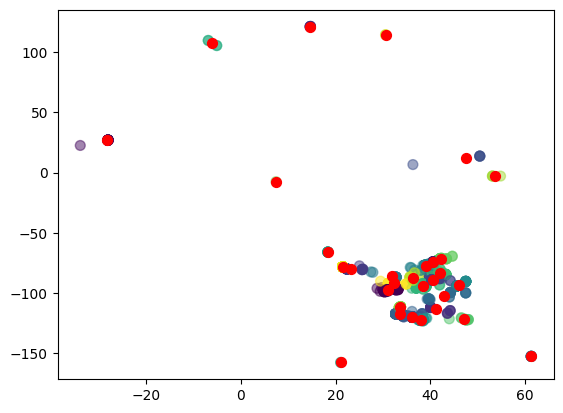

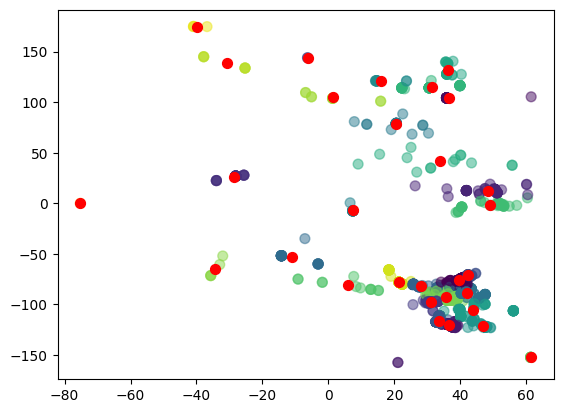

In [22]:
#K-Means Algorithm
def run_k_means(df1, num_cluster, printGraph):
    #Adding to Dataframe
    kmeans_elbow = KMeans(n_clusters=num_cluster-1)
    df1["cluster_label"] = kmeans_elbow.fit(df1).labels_

    if (printGraph):
        kmeans = KMeans(n_clusters=num_cluster).fit(df1)
        centroids = kmeans.cluster_centers_

        plt.scatter(df1['latitude'], df1['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()
        
us_clusters = 30
run_k_means(df_no_us, us_clusters, True)

world_clusters = 30
run_k_means(df_no_world, world_clusters, True)

In [23]:
print("This is the number of data points for the top ten clusters for the US dataframe.")
print(df_no_us['cluster_label'].value_counts().head(10))
print()
print("This is the number of data points for the top ten clusters for the world dataframe.")
print(df_no_world['cluster_label'].value_counts().head(10))

This is the number of data points for the top ten clusters for the US dataframe.
cluster_label
0     204
7     184
5     178
15    142
10    137
21     92
3      74
9      52
20     42
14     33
Name: count, dtype: int64

This is the number of data points for the top ten clusters for the world dataframe.
cluster_label
13    316
19    274
16    248
1     246
3     226
23    203
7     188
5     132
24     67
2      66
Name: count, dtype: int64


In [24]:
file2 = open(r'C:\Users\91892\Desktop\5TH SEM\Predictive Learning\Discovering-Disease-Outbreaks-From-News-Headlines-master\Tracking the Coronavirus Pandemic (Part 5)\Datasets\largest_us_cities.csv', 'r') 
large_cities = file2.readlines()

large_city_data = {}
for i in range(1, len(large_cities)):
    large_city_values = large_cities[i].strip().split(';')
    lat_long = large_city_values[-1].split(',')
    if ((int(large_city_values[-2]) >= 200000) and (large_city_values[0] != "Anchorage") and (large_city_values[0] != "Honolulu") and (large_city_values[0] != "Greensboro")):
        large_city_data[large_city_values[0]] = [lat_long[0], lat_long[1], large_city_values[-2]]

def haversine(point_a, point_b):
    lon1, lat1 = point_a[0], point_a[1]
    lon2, lat2 = point_b[0], point_b[1]
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r

for i in list(large_city_data.keys()):
    for j in list(large_city_data.keys()):
        if ((i != j) and haversine((float(large_city_data[i][0]), float(large_city_data[i][1])), (float(large_city_data[j][0]),
            float(large_city_data[j][1]))) < 80.0):
            if (large_city_data[j][2] > large_city_data[i][2]):
                large_city_data[i] = [np.nan, np.nan, large_city_data[i][2]]
            else:
                large_city_data[j] = [np.nan, np.nan, large_city_data[j][2]]
large_city_data['Chicago'] = [41.8781136, -87.6297982, 2718782]

print("Here is a subset of the large cities:")
print(list(large_city_data.keys())[:10])

Here is a subset of the large cities:
['Cleveland', 'Boise City', 'Lubbock', 'Kansas City', 'Montgomery', 'Columbus', 'Buffalo', 'Sacramento', 'Henderson', 'Spokane']


In [25]:
def print_k_means(df1, num_cluster, typeof, path, size, add_large_city, figsize):
    if (typeof == "US"):
        map_plotter = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33, lat_2=45)
    else:
        map_plotter = Basemap()
    if (figsize):
        fig = plt.figure(figsize = (24,16))
    else:
        fig = plt.figure(figsize = (12,8))
    coordinates = []
    for index in df1.index:
        coordinates.append([df1['latitude'][index], df1['longitude'][index], df1['cluster_label'][index]])
    
    cluster_vals = {}
    for i in range(num_cluster):
        cluster_vals[str(i)+"_long"] = []
        cluster_vals[str(i)+"_lat"] = []
    
    for index in df1.index:
        cluster_vals[str(df1['cluster_label'][index])+'_long'].append(float(df1['longitude'][index]))
        cluster_vals[str(df1['cluster_label'][index])+'_lat'].append(float(df1['latitude'][index]))
        
    num_list = [i for i in range(num_cluster)]
    color_list = ['rosybrown', 'lightcoral', 'indianred', 'brown',
                 'maroon', 'red', 'darksalmon', 'sienna', 'chocolate', 'sandybrown', 'peru',
                 'darkorange', 'burlywood', 'orange', 'tan', 'darkgoldenrod', 'goldenrod', 'gold', 'darkkhaki',
                 'olive', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'chartreuse',
                 'darkseagreen', 'forestgreen', 'darkgreen', 'mediumseagreen', 'mediumaquamarine',
                 'turquoise', 'lightseagreen', 'darkslategrey', 'darkcyan',
                 'cadetblue', 'deepskyblue', 'lightskyblue', 'steelblue', 'lightslategrey',
                 'midnightblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumpurple', 'rebeccapurple',
                 'thistle', 'plum', 'violet', 'purple', 'fuchsia', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink',
                 'palevioletred']
    colors = [color_list[i] for i in range(num_cluster+1)]

    for target,color in zip(num_list, colors):
         map_plotter.scatter(cluster_vals[str(target)+'_long'], cluster_vals[str(target)+'_lat'], latlon=True, s = size, c = color)
         map_plotter.shadedrelief()
    if (add_large_city):
        for index in list(large_city_data.keys()):
            if (large_city_data[index][1] != np.nan):
                x, y = map_plotter(large_city_data[index][1], large_city_data[index][0])
                plt.plot(x, y, "ok", markersize = 4)
                plt.text(x, y, index, fontsize = 16)
    plt.show()
    fig.savefig(path)

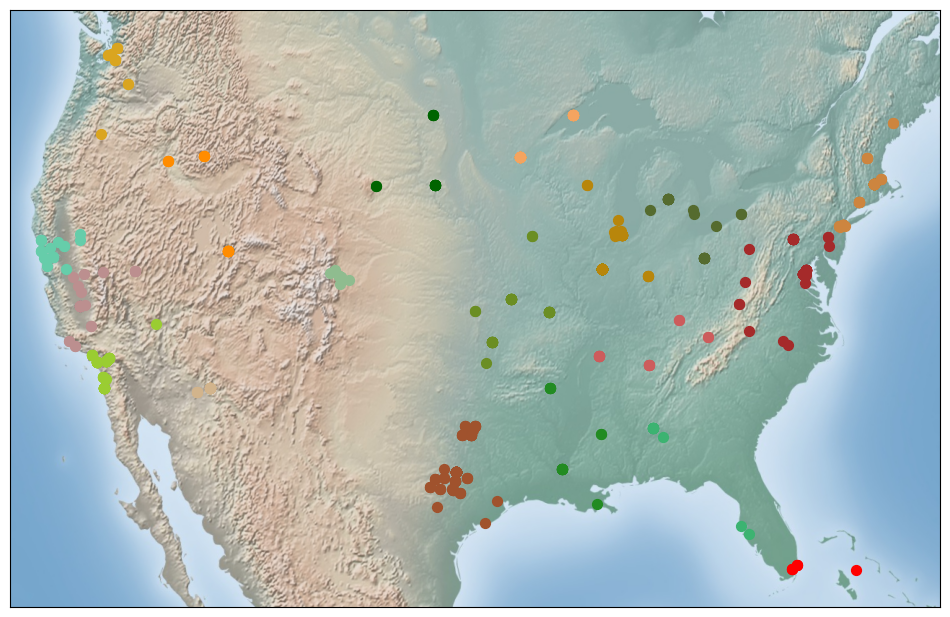

C:\Users\91892\AppData\Local\Temp\ipykernel_364\4277143781.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_center_us['cluster_label'][index] = index
C:\Users\91892\AppData\Local\Temp\ipykernel_364\4277143781.py:31: SettingWithCopyWar

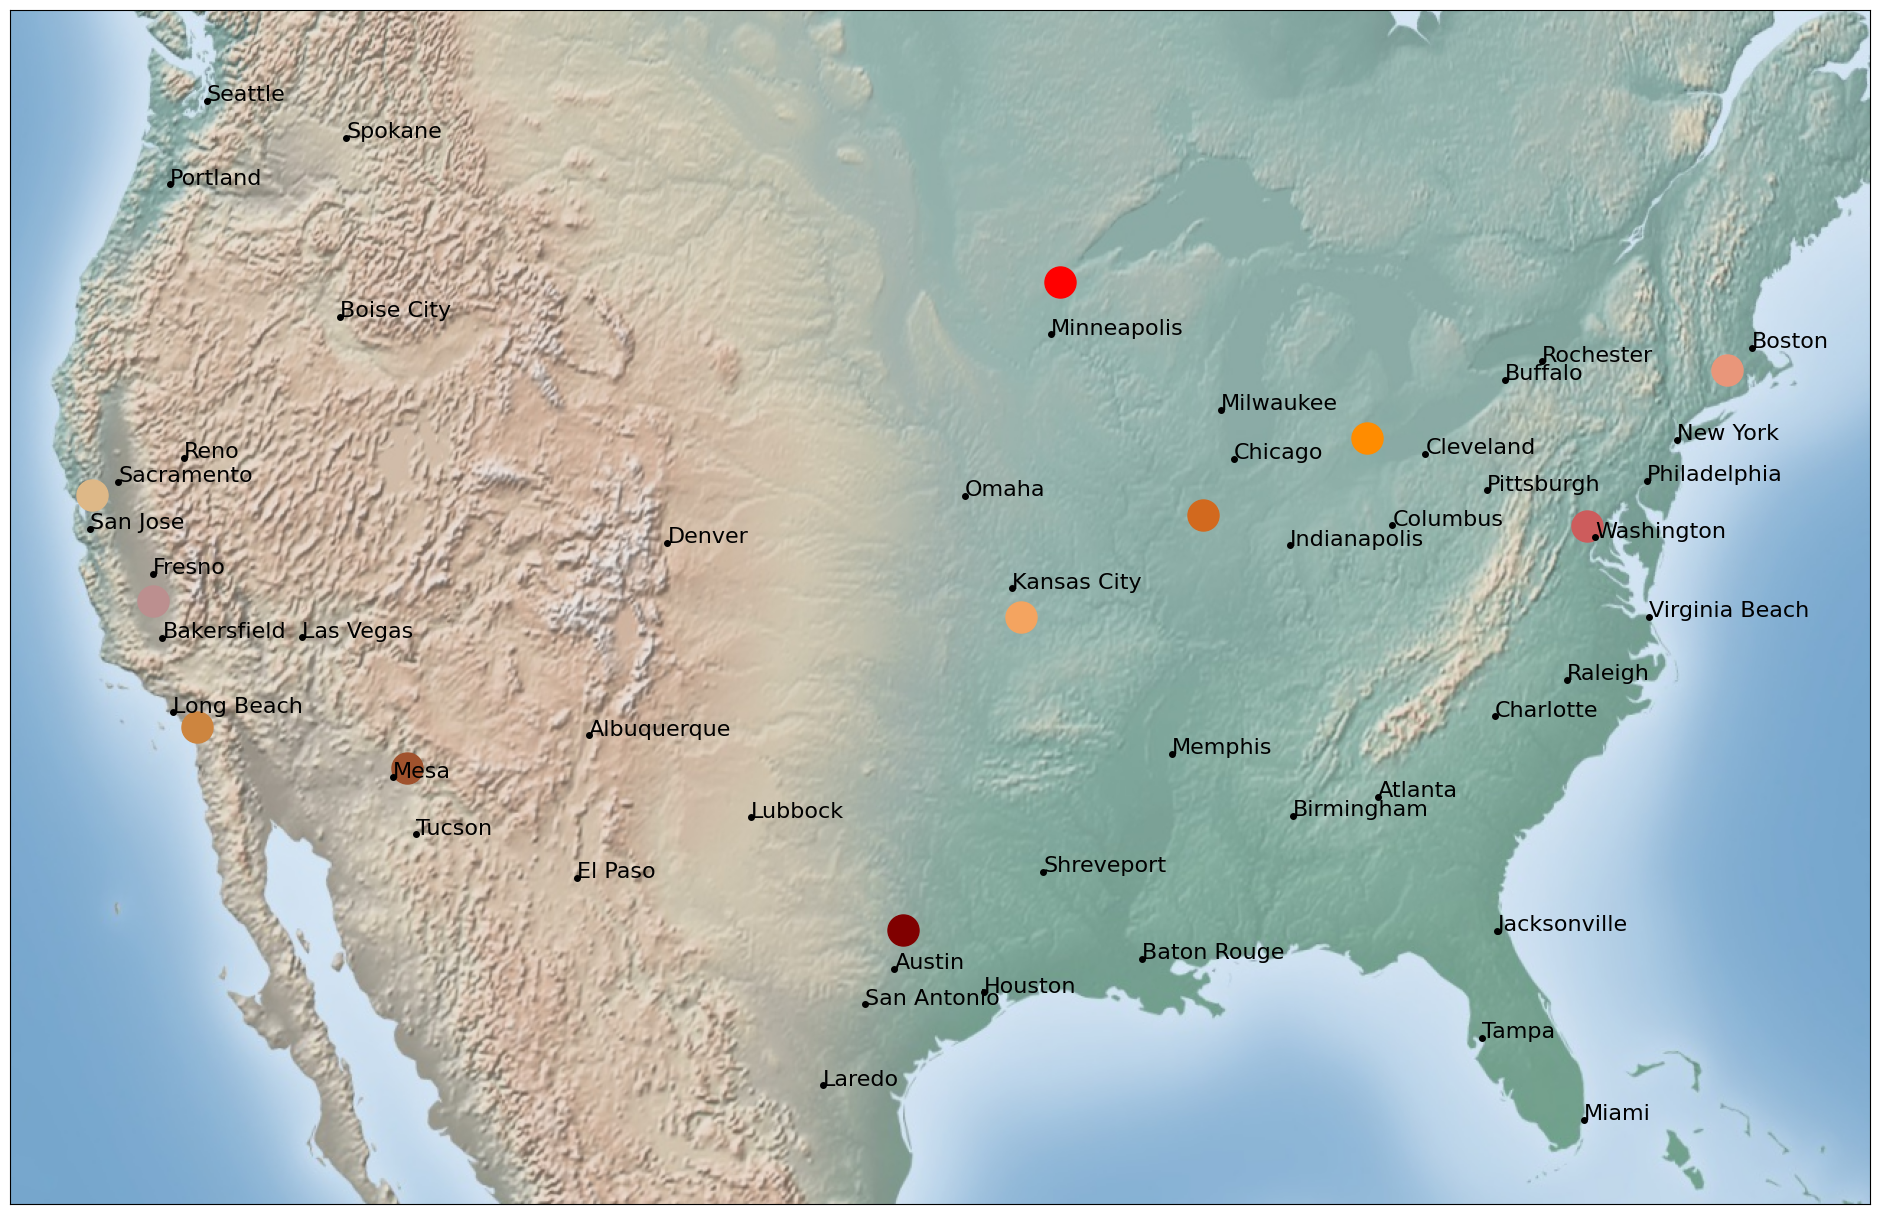

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

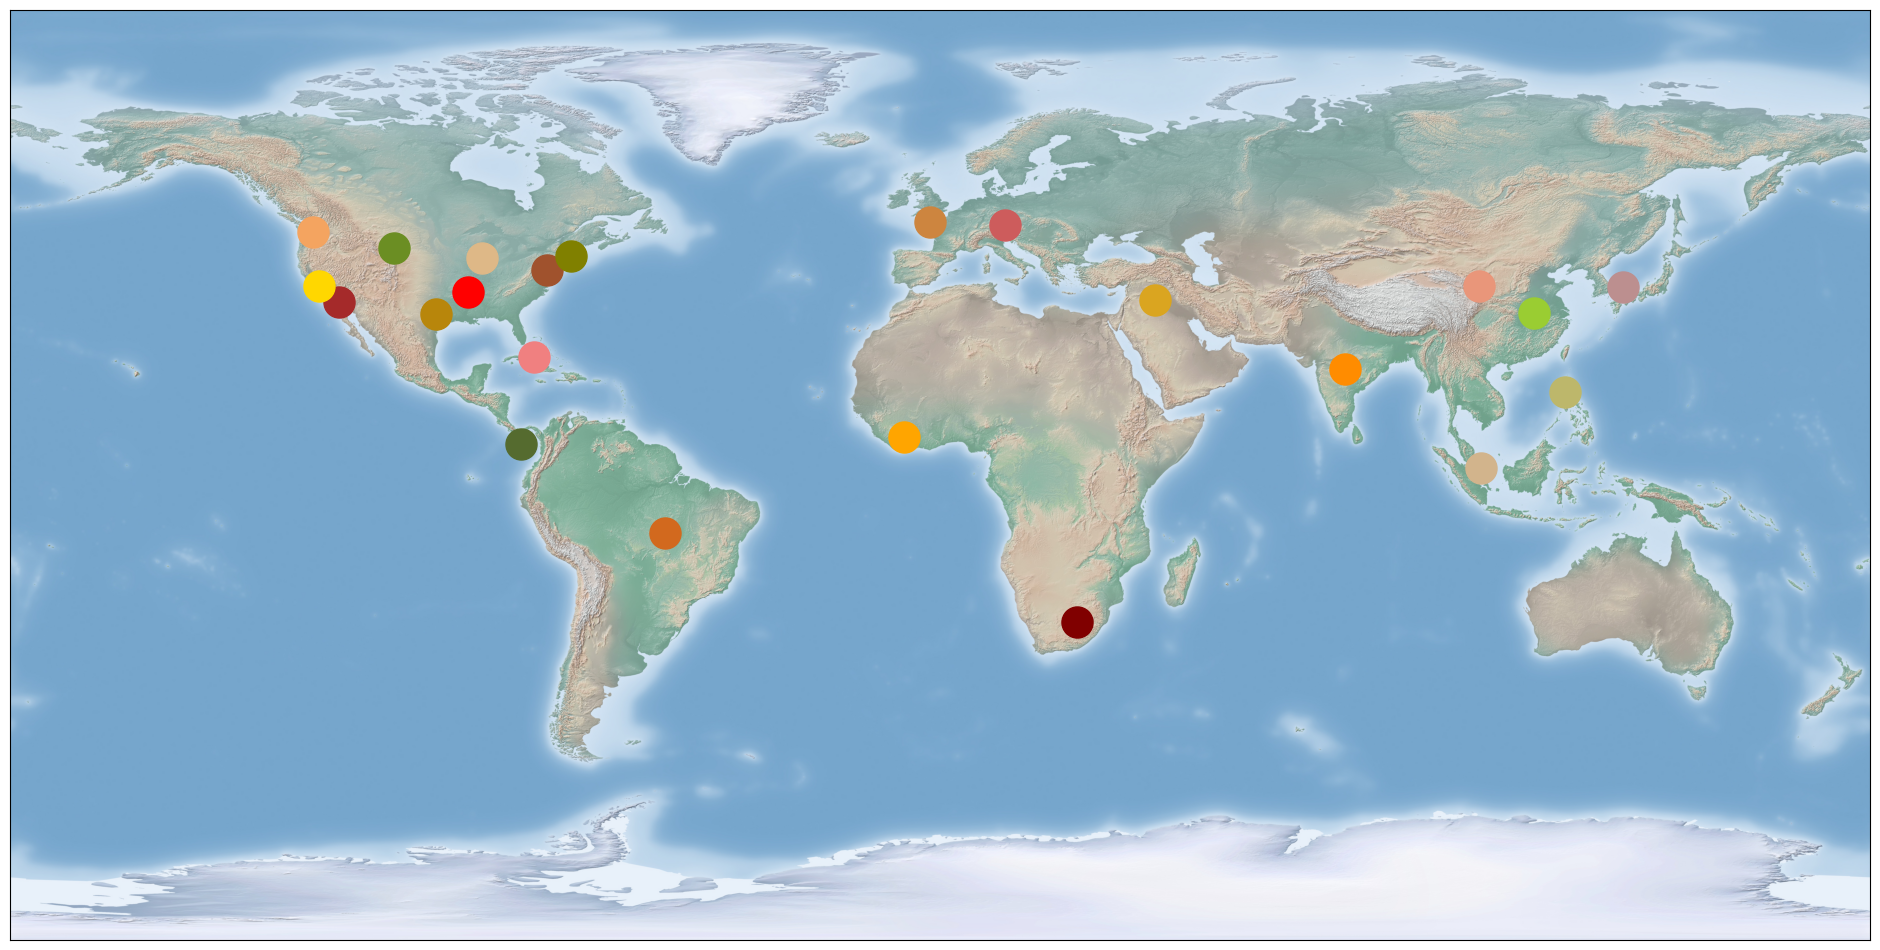

In [26]:
#Printing Results and Saving Results
print_k_means(df_no_us, us_clusters, "US", "corona_disease_outbreaks_us.png", 50, False, False)
df_no_us.to_csv("corona_disease_outbreaks_us.csv")

# print_k_means(df_no_world, world_clusters, "world", "corona_disease_outbreaks_world.png")
# df_no_world.to_csv("corona_disease_outbreaks_world.csv")


df_center_us = {'latitude': [], 'longitude':[] , 'cluster_label': []}
for i in range(us_clusters):
    df_1 = df_no_us.loc[df_no_us['cluster_label'] == i]
    df_1 = df_1.reset_index()
    del df_1['index']
    latitude = []
    longitude = []
    for index in df_1.index:
        latitude.append(float(df_1['latitude'][index]))
        longitude.append(float(df_1['longitude'][index]))
    df_1['latitude'] = latitude
    df_1['longitude'] = longitude
    sum_latitude = df_1['latitude'].sum()
    sum_longitude = df_1['longitude'].sum()
    if (len(df_1['latitude']) >= 20):
        df_center_us['latitude'].append(sum_latitude/(len(df_1['latitude'])))
        df_center_us['cluster_label'].append(i)
        df_center_us['longitude'].append(sum_longitude/(len(df_1['longitude'])))
df_center_us = pd.DataFrame(data = df_center_us)


for index in df_center_us.index:
    df_center_us['cluster_label'][index] = index

print_k_means(df_center_us, len(df_center_us['latitude']), "US", "corona_disease_outbreaks_us_centers.png", 500, True, True)
df_center_us.to_csv("corona_disease_outbreaks_us_centers.csv")

df_center_world = {'latitude': [], 'longitude':[] , 'cluster_label': []}
for i in range(world_clusters):
    df_1 = df_no_world.loc[df_no_world['cluster_label'] == i]
    df_1 = df_1.reset_index()
    del df_1['index']
    latitude = []
    longitude = []
    for index in df_1.index:
        latitude.append(float(df_1['latitude'][index]))
        longitude.append(float(df_1['longitude'][index]))
    df_1['latitude'] = latitude
    df_1['longitude'] = longitude
    sum_latitude = df_1['latitude'].sum()
    sum_longitude = df_1['longitude'].sum()
    if (len(df_1['latitude']) >= 10):
        df_center_world['latitude'].append(sum_latitude/(len(df_1['latitude'])))
        df_center_world['cluster_label'].append(i)
        df_center_world['longitude'].append(sum_longitude/(len(df_1['longitude'])))
df_center_world = pd.DataFrame(data = df_center_world)


for index in df_center_world.index:
    df_center_world['cluster_label'][index] = index

print_k_means(df_center_world, len(df_center_world['latitude']), "world", "corona_disease_outbreaks_world_centers.png", 500, False, True)
df_center_us.to_csv("corona_disease_outbreaks_world_centers.csv")